# Production Possibility Frontier, (combine with possible edgeworth box)

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, fixed
import pandas as pd

In [5]:
DatabaseDF = pd.read_csv("../CleanedDataset.csv")

## Definition:

It is graph that plots the quantity of two goods along its axis. A line is then drawn that goes through all possible combinations of those two goods that the individual can produce. he relationship shown in the PPC stems from the Opportunity Cost, which describes how by increasing the resources put into the creation of one good you necessarily decrease the resources put into another.

I think finding the correlation between two variables is the right step in determining what their eventual PPC curve will look like, however we must keep in mind that the line of best fit is not the actual PPC it is only a sign that there does appear to be a decrease in one good as another increases.

## Starting with Correlation between Limited Resources

In [6]:
DatabaseDF.head()

,Unnamed: 0,Operator,Well Name,Formation,Lateral Length,Stages,Township,Range,Section,"Total Prop, lbs",...,Fluid Type from DI,SPACING_CAPPED,12 month Cum Prod,Completion Type,Sleeves,P&P,Frac Ports,Repeater Ports,CT,Year Drilled
0,0,Operator 1,Well 1,MBH,5114.0,30.0,141,99,10,0.0,...,NaN,660.0,33.55,NaN,NaN,NaN,NaN,NaN,NaN,2006.0
1,1,Operator 2,Well 2,MBH,5181.0,NaN,142,99,16,418000.0,...,NaN,660.0,27.62,NaN,NaN,NaN,NaN,NaN,NaN,2005.0
2,2,Operator 2,Well 3,MBH,4780.0,15.0,142,99,24,568407.0,...,NaN,660.0,11.19,OH,NaN,NaN,NaN,NaN,NaN,2006.0
3,3,Operator 1,Well 4,MBH,10654.0,1.0,142,99,1,845000.0,...,NaN,660.0,27.85,NaN,NaN,NaN,NaN,NaN,NaN,2007.0
4,4,Operator 2,Well 5,MBH,5209.0,1.0,142,99,35,297366.0,...,NaN,660.0,50.88,OH,NaN,NaN,NaN,NaN,NaN,2006.0


In [7]:
spearmancorr = DatabaseDF.corr(method='spearman')
spearmancorr

,Unnamed: 0,Lateral Length,Stages,Township,Range,Section,"Total Prop, lbs","Fluid, bbls",Best1 Mo BOPD,Best3 Mo BOPD,...,Latitude,Longitude,SPACING_CAPPED,12 month Cum Prod,Sleeves,P&P,Frac Ports,Repeater Ports,CT,Year Drilled
Unnamed: 0,1.000000,0.077660,0.232800,0.381223,0.006677,-0.049775,0.243052,0.198040,0.127087,0.129392,...,0.385105,-0.044463,-0.118379,0.145759,0.203367,0.178904,-0.575608,0.666886,0.176944,0.184971
Lateral Length,0.077660,1.000000,0.435665,0.018391,0.181624,-0.030477,0.326196,0.307917,0.141420,0.142319,...,0.021630,-0.185652,-0.184828,0.177257,0.405629,0.424934,0.028158,0.872082,0.480787,0.312223
Stages,0.232800,0.435665,1.000000,0.052379,0.162301,0.029076,0.658696,0.630845,0.251405,0.244439,...,0.050454,-0.171085,-0.291524,0.340166,0.908350,0.877969,0.301994,0.229416,1.000000,0.648229
Township,0.381223,0.018391,0.052379,1.000000,-0.018511,0.025329,0.010163,-0.021137,-0.174974,-0.165998,...,0.997491,-0.123387,0.036315,-0.165085,0.104709,0.022196,-0.688001,0.666886,-0.172964,-0.039493
Range,0.006677,0.181624,0.162301,-0.018511,1.000000,-0.020666,0.133176,0.274213,-0.121818,-0.144633,...,-0.014452,-0.983496,-0.020250,-0.157996,0.138849,0.162309,0.449071,0.648886,0.164849,0.167011
Section,-0.049775,-0.030477,0.029076,0.025329,-0.020666,1.000000,0.025029,0.021621,0.018478,0.016098,...,-0.036515,0.017142,-0.017271,0.010521,0.039962,0.009927,0.319731,-0.205196,0.008116,0.032135
"Total Prop, lbs",0.243052,0.326196,0.658696,0.010163,0.133176,0.025029,1.000000,0.856374,0.320731,0.331295,...,0.008453,-0.136473,-0.279404,0.440060,0.529296,0.615773,0.424671,0.564288,-0.151921,0.611360
"Fluid, bbls",0.198040,0.307917,0.630845,-0.021137,0.274213,0.021621,0.856374,1.000000,0.282209,0.291956,...,-0.022095,-0.272063,-0.289765,0.401960,0.507377,0.629173,0.680200,-0.205196,-0.066131,0.649717
Best1 Mo BOPD,0.127087,0.141420,0.251405,-0.174974,-0.121818,0.018478,0.320731,0.282209,1.000000,0.970644,...,-0.177390,0.139445,-0.220560,0.891192,0.184210,0.188430,0.204660,-0.820783,0.495085,0.206711
Best3 Mo BOPD,0.129392,0.142319,0.244439,-0.165998,-0.144633,0.016098,0.331295,0.291956,0.970644,1.000000,...,-0.168382,0.161616,-0.225671,0.937187,0.160880,0.202089,0.214894,-0.666886,0.443253,0.206136


In [8]:
ALPHA = 0.34   # capital share in agriculture
BETA = 0.66   #

KBAR = 100
LBAR = 100

p = 1      # =Pa/Pm  relative price of ag goods

def F(K,L,alpha=ALPHA):
    """Agriculture Production function"""
    return (K**alpha)*(L**(1-alpha))

def G(K,L,beta=BETA):
    """Manufacturing Production function"""
    return (K**beta)*(L**(1-beta))

def budgetc(c1, p1, p2, I):
    return (I/p2)-(p1/p2)*c1

def isoq(L, Q, mu):
    return (Q/(L**(1-mu)))**(1/mu)

In [67]:
def edgeworth(L, Kbar=KBAR, Lbar=LBAR,alpha=ALPHA, beta=BETA):
    """efficiency locus: """
    a = (1-alpha)/alpha
    b = (1-beta)/beta
    return b*L*Kbar/(a*(Lbar-L)+b*L)

In [68]:
def ppf(LA,Kbar=KBAR, Lbar=LBAR,alpha=ALPHA,beta=BETA):
    """Draw a production possibility frontier

    arguments:
    LA -- labor allocated to ag, from which calculate QA(Ka(La),La)
    """
    KA = edgeworth(LA, Kbar, Lbar,alpha, beta)
    RTS = (alpha/(1-alpha))*(KA/LA)
    QA = F( KA,LA,alpha)
    QM = G(Kbar-KA,Lbar-LA,beta)
    ax.scatter(QA,QM)
    La = np.arange(0,Lbar)
    Ka = edgeworth(La, Kbar, Lbar,alpha, beta)
    Qa = F(Ka,La,alpha)
    Qm = G(Kbar-Ka,Lbar-La,beta)
    ax.set_xlim(0, Lbar)
    ax.set_ylim(0, Kbar)
    ax.plot(Qa, Qm,'k-')
    ax.set_xlabel(r'$Q_A$',fontsize=18)
    ax.set_ylabel(r'$Q_B$',fontsize=18)
    plt.show()

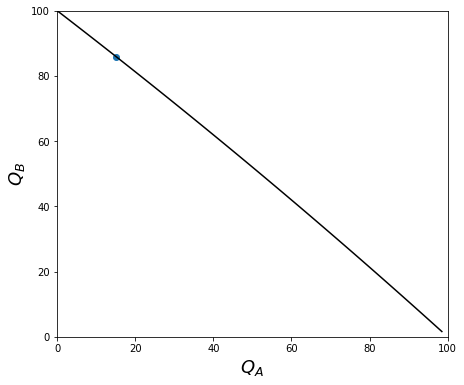

In [70]:
fig, ax = plt.subplots(figsize=(7,6))
ppf(20, alpha=0.4, beta=0.6)